## Gather

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Source: https://www.futurelearn.com/info/courses/data-analytics-python-learning-python-functions/0/steps/190359
df=pd.read_csv('Brazilian-fire-dataset.csv')

## Assess

In [14]:
df.head()

,Year,State,Month,Number of Fires,Date Reported
0,1998,Acre,January,0.0,1/01/1998
1,1999,Acre,January,0.0,1/01/1999
2,2000,Acre,January,0.0,1/01/2000
3,2001,Acre,January,0.0,1/01/2001
4,2002,Acre,January,0.0,1/01/2002


In [15]:
df.sample(5).sort_index()

,Year,State,Month,Number of Fires,Date Reported
238,2016,Acre,December,6.000,1/01/2016
877,2017,Amazonas,August,6.316,1/01/2017
1692,2016,Espírito Santo,January,43.000,1/01/2016
4106,2000,Piauí,March,14.000,1/01/2000
4653,2009,Rio Grande do Norte,June,0.000,1/01/2009


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             6454 non-null   int64  
 1   State            6454 non-null   object 
 2   Month            6454 non-null   object 
 3   Number of Fires  6454 non-null   float64
 4   Date Reported    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [17]:
df.describe(include='all')

,Year,State,Month,Number of Fires,Date Reported
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,27,12,NaN,20
top,NaN,Alagoas,January,NaN,1/01/2016
freq,NaN,240,541,NaN,324
mean,2007.461729,NaN,NaN,108.293163,NaN
std,5.746654,NaN,NaN,190.812242,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,3.000000,NaN
50%,2007.000000,NaN,NaN,24.000000,NaN
75%,2012.000000,NaN,NaN,113.000000,NaN


In [18]:
df.groupby('Month')['Number of Fires'].sum().sort_values()

Month
April        28188.770
March        30717.405
February     30848.050
May          34731.363
January      47747.844
June         56010.675
December     57535.480
September    58578.305
November     85508.054
August       88050.435
October      88681.579
July         92326.113
Name: Number of Fires, dtype: float64

In [19]:
df['Month'].value_counts()

January      541
August       540
October      540
November     540
April        540
June         540
May          540
July         540
February     540
March        540
September    540
December     513
Name: Month, dtype: int64

In [20]:
df['State'].value_counts()

Alagoas                240
Ceará                  239
Pernambuco             239
Pará                   239
Rio Grande do Norte    239
Sergipe                239
Piauí                  239
Rio de January         239
Mato Grosso            239
Mato Grosso do Sul     239
Rondônia               239
Espírito Santo         239
Maranhão               239
Goiás                  239
Distrito Federal       239
Minas Gerais           239
Bahia                  239
Tocantins              239
Amazonas               239
Amapá                  239
Roraima                239
São Paulo              239
Acre                   239
Santa Catarina         239
Rio Grande do Sul      239
Paraíba                239
Paraná                 239
Name: State, dtype: int64

### Quality

* Round **`Number of Fires`** Column to the nearst integer number
- Data types of some columns need to be converted.

## Clean

In [21]:
df_clean=df.copy()

### Quality

**Define**

Round **`Number of Fires`** Column to the nearst integer number

__Code__

In [22]:
df_clean['Number of Fires']=df_clean['Number of Fires'].round()

__Test__

In [23]:
df_clean['Number of Fires'].apply(float.is_integer).all()

True

In [24]:
df_clean.groupby('Month')['Number of Fires'].sum().sort_values()

Month
April        28189.0
March        30717.0
February     30848.0
May          34731.0
January      47748.0
June         56008.0
December     57535.0
September    58570.0
November     85503.0
August       88041.0
October      88678.0
July         92324.0
Name: Number of Fires, dtype: float64

__Define__

Data types of some columns need to be converted.



__Code__

In [25]:
df_clean['Number of Fires']=df_clean['Number of Fires'].astype(int)

In [26]:
df_clean['Year']=pd.to_datetime(df_clean['Year'])

In [27]:
df_clean['Date Reported']=pd.to_datetime(df_clean['Date Reported'])

__Test__

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             6454 non-null   datetime64[ns]
 1   State            6454 non-null   object        
 2   Month            6454 non-null   object        
 3   Number of Fires  6454 non-null   int32         
 4   Date Reported    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int32(1), object(2)
memory usage: 227.0+ KB


**Store**

In [29]:
df_clean.to_csv('Brazilian-fire-dataset-wrangled.csv',index=False)

In [30]:
pd.read_csv('Brazilian-fire-dataset-wrangled.csv').sample(7).sort_index()

,Year,State,Month,Number of Fires,Date Reported
1637,1970-01-01 00:00:00.000002000,Distrito Federal,November,0,2000-01-01 00:00:00.000000000
1896,1970-01-01 00:00:00.000002000,Espírito Santo,December,3,2000-01-01 00:00:00.000000000
3440,1970-01-01 00:00:00.000002011,Paraíba,May,0,2011-01-01 00:00:00.000000000
3779,1970-01-01 00:00:00.000002011,Paraná,October,256,2011-01-01 00:00:00.000000000
4071,1970-01-01 00:00:00.000002005,Piauí,January,94,2005-01-01 00:00:00.000000000
5390,1970-01-01 00:00:00.000002009,Roraima,July,18,2009-01-01 00:00:00.000000000
6221,1970-01-01 00:00:00.000002004,Tocantins,January,40,2004-01-01 00:00:00.000000000


## Analyzing & Visualizing Data

In [ ]:
df_clean.plot(kind='bar',x='State',y='Number of Fires',figsize=(150, 20));

In [3]:
df_pie=df.groupby('Month')['Number of Fires'].sum().sort_values()

In [11]:
df_pie

Month
April        28188.770
March        30717.405
February     30848.050
May          34731.363
January      47747.844
June         56010.675
December     57535.480
September    58578.305
November     85508.054
August       88050.435
October      88681.579
July         92326.113
Name: Number of Fires, dtype: float64

In [8]:
# This is an additional step as pie chart can be done using only groupby series
df_pie.to_frame(name = 'Total Number of Fires').reset_index()

,Month,Total Number of Fires
0,April,28188.770
1,March,30717.405
2,February,30848.050
3,May,34731.363
4,January,47747.844
5,June,56010.675
6,December,57535.480
7,September,58578.305
8,November,85508.054
9,August,88050.435


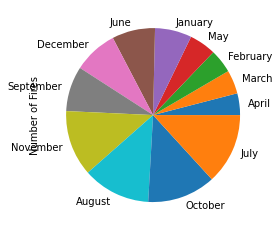

In [12]:
df_pie.plot.pie(y='Total Number of Fires');